- Topic: Taming Bias, Variance, and Multicollinearity: The Power of Regularization in Machine Learning
- Unit: ADS1002
- Level: Beginner
- Author: Ashish Dutt
- Version: 0.0.1

### Taming Bias, Variance, and Multicollinearity: The Power of Regularization in Machine Learning

1. **Bias:**
   - **What is it?** Bias is the error introduced by assuming that the model is too simple. It happens when the model doesn't capture the complexity of the data, leading to inaccurate predictions.
   - **Real-world example:** Imagine you're trying to predict house prices using only the square footage, ignoring other factors like location or number of rooms. Your predictions will likely be consistently off because you're missing important information.
   - **Python Example:**

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

Predicted price for 3000 sq ft: 350000.0


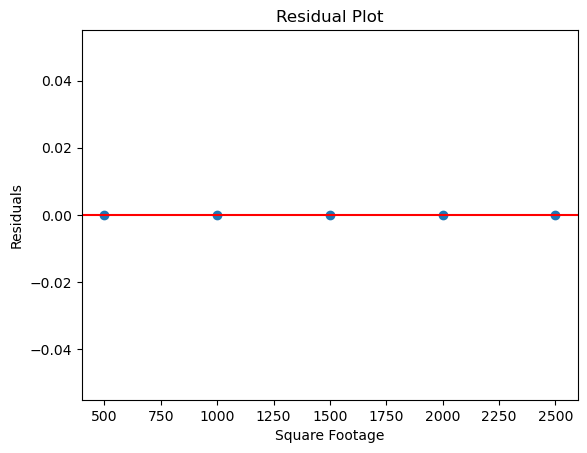

Mean Squared Error: 0.0


In [29]:
# Simple dataset with square footage and price
squareFoot = np.array([[500], [1000], [1500], [2000], [2500]])
price = np.array([100000, 150000, 200000, 250000, 300000])

# Linear regression model (high bias, missing other factors)
model = LinearRegression()
model.fit(squareFoot, price)

# Prediction
predictions = model.predict(squareFoot)
prediction = model.predict([[3000]])
print(f"Predicted price for 3000 sq ft: {prediction[0]}")

# Calculate and plot residuals to identify the bias
residuals = price - predictions
plt.scatter(squareFoot, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Square Footage')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate and print Mean Squared Error
mse = mean_squared_error(price, predictions)
print(f"Mean Squared Error: {mse}")

In the above residual plot, shows a horizontal line at the `y=0` value, it means that the model's predictions perfectly match the actual values for the training data. In other words, the residuals (the differences between the predicted and actual values) are all zero.

**Interpretation**:

- **Perfect Fit on Training Data**: The model has perfectly fitted the training data, meaning the linear regression line passes exactly through all the data points. This is an unusual scenario in real-world datasets and indicates that the model has no error on the training data.
- **Possible Overfitting or Simple Data**: This could happen for a couple of reasons:
    1. **Simple Data**: The dataset is extremely simple, with a perfect linear relationship between the features (square footage) and the target variable (price). In this case, the model has no difficulty capturing the relationship.
    2. **Overfitting (Hypothetically)**: Although overfitting usually leads to poor generalization and more complex models, if the model were more complex, it could fit the training data perfectly but fail on unseen data. However, since this is a simple linear model and the dataset itself is simple, this scenario is less likely here.

**Does It Mean There's No Bias?**

- **No Bias on Training Data**: Since the model predicts the training data perfectly, there is no apparent bias in this specific instance. However, this does not necessarily mean the model will perform well on new, unseen data.
- **Potential for Bias in Real-World Scenarios**: If you were to introduce more features (like number of rooms, location, etc.) or use this model on a more complex dataset, the perfect fit might no longer hold, and bias could emerge.

**Key Takeaway**:

1. **Training vs. Generalization**: The perfect residual plot indicates that the model has perfectly captured the relationship in this specific, simple dataset. However, in more complex, real-world scenarios, this perfect fit is rare, and other factors (like bias or variance) usually come into play. It's essential to evaluate the model on unseen data to ensure it generalizes well.
2. **Residual Plot**:
    - If the residual plot shows a pattern (e.g., U-shape), it indicates that the linear model is not capturing some of the complexity in the data, leading to bias.
    - A random scatter of residuals around zero would indicate that the model is well-fitted. However, any clear pattern suggests high bias.
3. **Mean Squared Error (MSE)**:
     - If the MSE is high, it suggests that the model's predictions are consistently off, indicating a biased model.
  
**Conclusion**:

If you observe a systematic pattern in the residuals or if adding more features significantly improves the model, it suggests that the original model suffers from high bias due to oversimplification.

2. **Variance:**
   - **What is it?** Variance is the error introduced by the model being too sensitive to the training data. A model with high variance pays too much attention to the training data, capturing noise along with the signal.
   - **Real-world example:** Imagine trying to predict house prices using every tiny detail about each house (e.g., the color of the curtains). Your model might work very well on your specific dataset but perform poorly on new data.
   - **Python Example:**

#### How to identify Variance?

Variance can be analysed by using residual analysis, or testing on unseen data:

- **Unseen Data**: Testing on unseen data helps assess the model’s true generalization capability. A high Mean Squared Error (MSE) on unseen data, especially if it’s significantly larger than the training or cross-validation MSE, could indicate that the model is overfitting (high variance). 

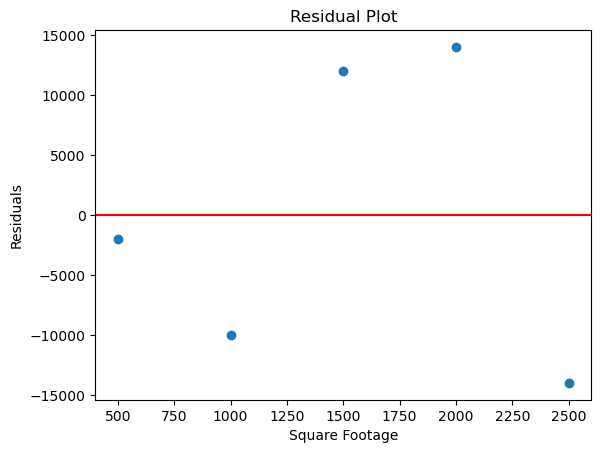

Mean Squared Error on Training Data: 128000000.0
Mean Squared Error on Unseen Data: 402666666.67
Predicted price for 3000 sq ft: 342000.0, Actual price: 320000
Predicted price for 3500 sq ft: 390000.0, Actual price: 370000
Predicted price for 4000 sq ft: 438000.0, Actual price: 420000


In [33]:
# Dataset with square footage and price (with noise)
squareFoot = np.array([[500], [1000], [1500], [2000], [2500]])
price = np.array([100000, 140000, 210000, 260000, 280000])  # Added noise

# Linear regression model (overfitting possible if the data is too complex)
model = LinearRegression()
model.fit(squareFoot, price)

# Prediction on training data
predictions = model.predict(squareFoot)

# Calculate residuals
residuals = price - predictions

# Plot residuals
plt.scatter(squareFoot, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Square Footage')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate and print Mean Squared Error
mse = mean_squared_error(price, predictions)
print(f"Mean Squared Error on Training Data: {round(mse,2)}")

# Test on Unseen Data
# New unseen data
new_data = np.array([[3000], [3500], [4000]])
true_prices = np.array([320000, 370000, 420000])  # Hypothetical actual prices

# Predict prices on new unseen data
new_predictions = model.predict(new_data)

# Calculate and print MSE on unseen data
mse_unseen = mean_squared_error(true_prices, new_predictions)
print(f"Mean Squared Error on Unseen Data: {round(mse_unseen,2)}")

# Print predictions and compare with actual values
for i, sq_ft in enumerate(new_data):
    print(f"Predicted price for {sq_ft[0]} sq ft: {round(new_predictions[i],2)}, Actual price: {true_prices[i]}")


3. **Multicollinearity:**
   - **What is it?** Multicollinearity occurs when two or more features in a model are highly correlated, making it difficult for the model to determine the individual effect of each feature.
    - **Real-world example:** Imagine trying to predict house prices using both the square footage and the number of rooms, but in your dataset, houses with larger square footage almost always have more rooms. The model struggles to decide how much each factor contributes to the price.
    - **Python Example:**

In [24]:
# Dataset with square footage, number of rooms, and price
np.random.seed(0)  # For reproducibility
data = pd.DataFrame({
    'SquareFootage': [500, 1000, 1500, 2000, 2500],
    'Rooms': [2, 2, 3, 4, 4],  # Slight variation to avoid perfect correlation
    'Price': [100000, 150000, 200000, 250000, 300000]
})

# Features and target
X = data[['SquareFootage', 'Rooms']]
y = data['Price']

# Add a constant column for the intercept term
# X = sm.add_constant(X)

# Display the dataset
print(X)

   SquareFootage  Rooms
0            500      2
1           1000      2
2           1500      3
3           2000      4
4           2500      4


`variance_inflation_factor` use to detect multicollinearity

In [25]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

         Feature        VIF
0  SquareFootage  28.670213
1          Rooms  28.670213


**Variance Inflation factor (VIF) Calculation**

- The Variance Inflation Factor (VIF) quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other features.
- A VIF value above 5 or 10 is often considered indicative of high multicollinearity.

**Variance Inflation factor (VIF) Interpretation**

- The VIF values for "SquareFootage" and "Rooms" are very high, suggesting strong multicollinearity between these two features.
- 
The high VIF indicates that these features are highly correlated, which could make it difficult to determine their individual impact on "Price" in a regression model

**How to deal with Multicollinearity?** 

- If you encounter high VIF values, you may consider removing one of the correlated features or using regularization techniques (like Ridge or Lasso) to address multicollinearity..

4. **Bias-Variance Tradeoff**
    - **What is it?** The bias-variance tradeoff is the balance between two types of errors in a model:
        - **High bias** models are too simple and miss important patterns (underfitting).
        - **High variance** models are too complex and capture noise as if it were a pattern (overfitting).

    The goal is to find a model that minimizes both errors by being just complex enough to capture the true patterns in the data without being too sensitive to the noise.
   - **Importance in Regularization:**
       - Regularization techniques like Lasso or Ridge regression add a penalty to the model for being too complex, which helps to reduce variance (overfitting). This way, the model remains flexible enough to learn patterns but avoids capturing noise.
    - **Python Example**

In [5]:
# Dataset with square footage and price (with noise)
squareFoot = np.array([[500], [1000], [1500], [2000], [2500]])
price = np.array([100000, 140000, 210000, 260000, 280000])  # Added noise

# Splitting data into training and testing
squareFoot_train, squareFoot_test, price_train, price_test = train_test_split(squareFoot, price, 
                                                                      test_size=0.2, random_state=42)

# Ridge regression (regularization to reduce variance)
model = Ridge(alpha=1.0) # 'alpha' controls the strength of regularization
model.fit(squareFoot_train, price_train)

# Prediction
prediction = model.predict([[3000]])
print(f"Predicted price for 3000 sq ft with regularization: {round(prediction[0],2)}")

Predicted price for 3000 sq ft with regularization: 340571.37


### Code explanation on how Ridge Regression is helping to prevent model overfitting

1. **Data Preparation**:
   - We create a dataset with some noise added to the target variable (y). Noise in the data can lead to overfitting if the model becomes too sensitive to it.
2. **Train-Test Split**:
    - We split the dataset into training and testing sets to evaluate how well the model generalizes to unseen data. Overfitting would be indicated by a model performing well on the training data but poorly on the test data.
3. **Ridge Regression Model**:
   - `model = Ridge(alpha=1.0)`: Here, we're using Ridge regression with `alpha=1.0`. The alpha parameter controls the strength of the regularization:
   - **If `alpha` is 0**: <u>The model is equivalent to a standard linear regression with no regularization</u>, potentially leading to high variance and overfitting.
   - **As alpha increases**: The regularization effect becomes stronger, penalizing large coefficients more. This reduces the model's complexity and, therefore, its variance.
4. **Training the Model**:
    - `model.fit(squareFoot_train, price_train)`: The model is trained on the training data. The regularization term in Ridge regression prevents the coefficients from growing too large, thereby reducing the model's sensitivity to the noise in the data.
5. **Prediction**:
    - `prediction = model.predict([[3000]])`: We make a prediction for a house with 3000 square feet. The regularization ensures that the prediction isn't overly influenced by the noise present in the training data.

### How Bias, Variance, and Multicollinearity Relate to Regularization:

- **Bias** refers to the error introduced by simplifying assumptions in the model. High bias can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.
- **Variance** refers to the model's sensitivity to small fluctuations in the training data. High variance can lead to overfitting, where the model captures noise instead of the true signal.
- **Multicollinearity** occurs when two or more features in the data are highly correlated. This can lead to unstable estimates of model coefficients, making it hard to determine the individual effect of each feature.
- **Regularization** techniques like Lasso (L1) and Ridge (L2) are used to address these issues. Regularization adds a penalty to the loss function to control the magnitude of the coefficients. This reduces variance by discouraging the model from fitting noise and helps with multicollinearity by shrinking the coefficients of correlated features. While this can introduce some bias (bias-variance tradeoff), it generally leads to better generalization on unseen data.

This relationship is crucial in creating models that balance complexity and generalization, ensuring they perform well on both training and unseen data.